In [3]:
import pandas as pd 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# Carregar o arquivo CSV com os vetores LBP
df = pd.read_csv(r"/home/pedro/Documentos/Faculdade/projeto-5-redes-profundas-projeto-v-produtos-industriais/data/lbp good - lbp.csv")

# Visualizar as primeiras linhas
df.head()

,filename,label,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,...,lbp_16,lbp_17,lbp_18,lbp_19,lbp_20,lbp_21,lbp_22,lbp_23,lbp_24,lbp_25
0,000.png,good,0.022179,0.008426,0.009686,0.010623,0.011858,0.013636,0.016634,0.020968,...,0.027714,0.020461,0.016196,0.013216,0.011402,0.010269,0.009468,0.008390,0.021811,0.190917
1,001.png,good,0.023808,0.008860,0.010056,0.011246,0.012219,0.013918,0.016574,0.021164,...,0.027237,0.020768,0.015991,0.013437,0.011843,0.010663,0.009802,0.008818,0.022241,0.200275
2,002.png,good,0.022923,0.008600,0.009553,0.010564,0.011635,0.013868,0.016291,0.021204,...,0.027122,0.020551,0.016040,0.013686,0.011771,0.010870,0.009949,0.009076,0.024231,0.196911
3,003.png,good,0.021072,0.008367,0.009146,0.009781,0.010906,0.012549,0.015234,0.019936,...,0.027042,0.020056,0.015265,0.012304,0.010305,0.009534,0.009148,0.008441,0.020076,0.202497
4,004.png,good,0.022981,0.008577,0.009546,0.010622,0.011930,0.013856,0.016784,0.021185,...,0.027145,0.020166,0.015928,0.012906,0.011367,0.010477,0.009765,0.008545,0.021615,0.194337


In [5]:
# Extrair os vetores LBP
X = df[[col for col in df.columns if col.startswith("lbp_")]].values

# Número de clusters
n_clusters = 12

# Aplicar KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Calcular distâncias até os centróides
distances = cdist(X, kmeans.cluster_centers_, 'euclidean')
selected_indices = []

for cluster_id in range(n_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    cluster_distances = distances[cluster_indices, cluster_id]
    closest_index = cluster_indices[np.argmin(cluster_distances)]
    selected_indices.append(closest_index)

# Montar DataFrame com os resultados
result_df = df.loc[selected_indices, ['filename']].copy()
result_df['cluster'] = list(range(n_clusters))
result_df

,filename,cluster
41,041.png,0
38,038.png,1
7,007.png,2
44,044.png,3
13,013.png,4
37,037.png,5
9,009.png,6
35,035.png,7
45,045.png,8
56,056.png,9


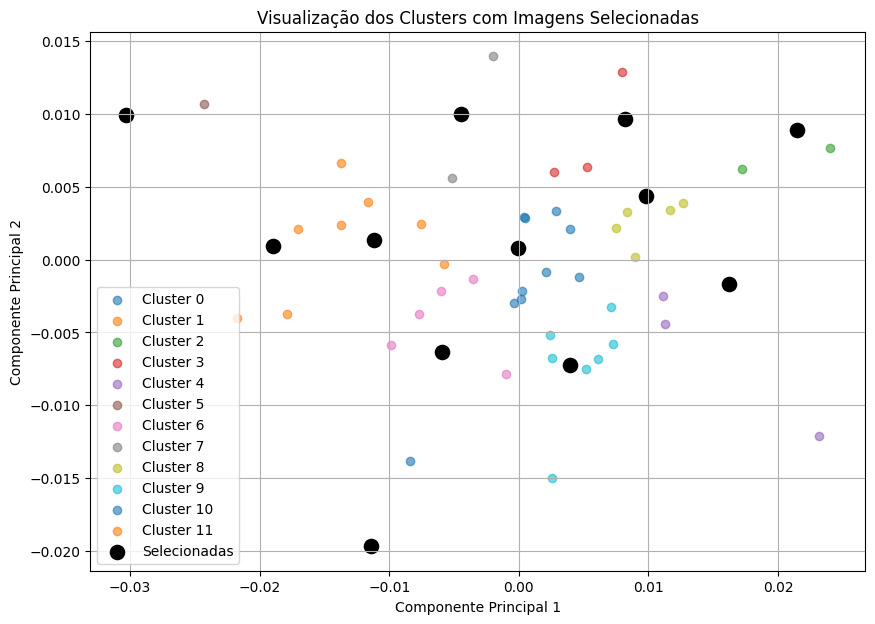

In [6]:
# Reduzir dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotar os clusters
plt.figure(figsize=(10, 7))
for cluster_id in range(n_clusters):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

# Destacar as imagens selecionadas
selected_pca = X_pca[selected_indices]
plt.scatter(
    selected_pca[:, 0],
    selected_pca[:, 1],
    color='black',
    edgecolor='white',
    s=150,
    label='Selecionadas'
)

plt.title("Visualização dos Clusters com Imagens Selecionadas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()